# Post-processing

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import xarray as xr

## Create a reconstruction result object

In [2]:
# res = cfr.ReconRes('./data/exp_mc', verbose=True)
# res = cfr.ReconRes('./data/exp_Zhu22_Corals_iCESM', verbose=True)
# res = cfr.ReconRes('./data/exp_Zhu22_Corals_CCSM4', verbose=True)
res = cfr.ReconRes('./data/exp_Zhu22_Corals_CCSM4_updated_Palmyra', verbose=True)
print(res)

>>> recon.paths:
['./data/exp_Zhu22_Corals_CCSM4/job_r00_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r01_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r02_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r03_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r04_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r05_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r06_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r07_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r08_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r09_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r10_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r11_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r12_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r13_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r14_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r15_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r16_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r17_recon.nc', './data/exp_Zhu22_Corals_CCSM4/job_r18_recon.nc', './data/exp_Zhu22_Corals_CCSM4/j

## Load reconstructed variables

In [3]:
vn = 'nino3.4'
res.load(vn)
res.da[vn]

<xarray.DataArray 'nino3.4' (year: 2001, ens: 5000)>
array([[-0.40109185,  1.01652805,  0.6159383 , ..., -0.86084042,
         2.55819789, -1.30556798],
       [-0.40109185,  1.01652805,  0.6159383 , ..., -0.86084042,
         2.55819789, -1.30556798],
       [-0.40109185,  1.01652805,  0.6159383 , ..., -0.86084042,
         2.55819789, -1.30556798],
       ...,
       [-0.43618194,  0.94859415,  0.53076795, ..., -0.92093348,
         2.52663836, -1.31651285],
       [-0.59487107,  0.78990502,  0.37207882, ..., -0.8950343 ,
         2.55253754, -1.29061367],
       [-0.52400201,  0.87650517,  0.44222249, ..., -0.88979089,
         2.5516207 , -1.29612249]])
Coordinates:
  * year     (year) int64 0 1 2 3 4 5 6 7 ... 1994 1995 1996 1997 1998 1999 2000
  * ens      (ens) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

In [4]:
# vn = 'tas'
# res.load(vn)
# res.da[vn]

In [5]:
# fig, ax = res.recons['tas'].plot(it=-1)

## Validation

In [6]:
import scipy.io as sio
import numpy as np

data = sio.loadmat('./data/BC09_NINO34.mat')
start_yr = 1874
end_yr = 2000
nyr = end_yr-start_yr+1
nino34 = np.zeros(nyr)
for i in range(nyr):
    nino34[i] = np.mean(data['nino34'][12+i*12:14+i*12])

BC09_value = nino34
BC09_time=np.arange(start_yr, end_yr+1)

In [7]:
with xr.open_dataset('./data/recon_Corals.nc') as ds:
    Zhu22_value = ds['nino34'].values[2, :]
    Zhu22_time = ds['nino34'].year

In [8]:
with xr.open_dataset('./data/ERSSTv5_sst_DJF.nc') as ds:
    ERSSTv5_value = cfr.utils.geo_mean(ds['tas'], lat_min=-5, lat_max=5, lon_min=np.mod(-170, 360), lon_max=np.mod(-120, 360))
    ERSSTv5_time = ds['year']

In [9]:
import pandas as pd

ts1 = pd.Series(index=res.recons['nino3.4'].time, data=res.recons['nino3.4'].median)
ts2 = pd.Series(index=BC09_time, data=BC09_value)
ts3 = pd.Series(index=Zhu22_time, data=Zhu22_value)
ts4 = pd.Series(index=ERSSTv5_time, data=ERSSTv5_value)

ts1 = ts1[(ts1.index >= start_yr) & (ts1.index <= end_yr)]
ts2 = ts2[(ts2.index >= start_yr) & (ts2.index <= end_yr)]
ts3 = ts3[(ts3.index >= start_yr) & (ts3.index <= end_yr)]
ts4 = ts4[(ts4.index >= start_yr) & (ts4.index <= end_yr)]

r12 = ts1.corr(ts2)
r13 = ts1.corr(ts3)
r23 = ts2.corr(ts3)
r14 = ts1.corr(ts4)
r34 = ts3.corr(ts4)
print(r12, r13, r23, r14, r34)

0.6359201923144684 0.9386469790203374 0.7091863143851793 0.6023318908282116 0.6617858792767201


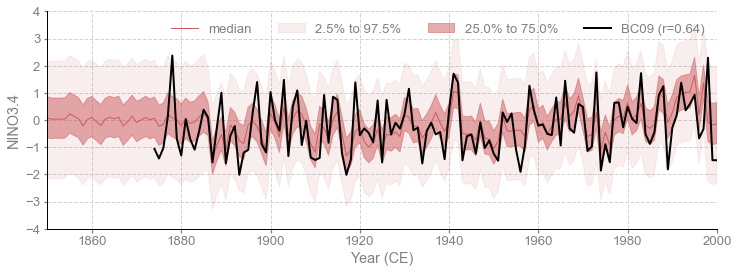

In [10]:
fig, ax = res.recons['nino3.4'].plot_qs(ylabel='NINO3.4')
ax.plot(BC09_time, BC09_value, color='k', label=f'BC09 (r={r12:.2f})')
# ax.plot(Zhu22_time, Zhu22_value, color='tab:blue', label=f'Zhu22 (r={r13:.2f})')
# ax.plot(ERSSTv5_time, ERSSTv5_value, color='tab:orange', label=f'ERSSTv5 (r={r14:.2f})')
ax.set_ylim(-4, 4)
ax.set_xlim(1850, 2000)
ax.legend(ncol=5)

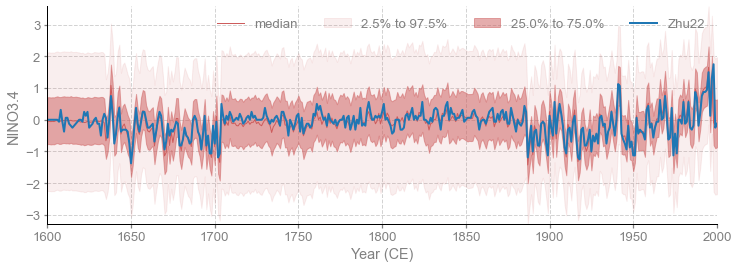

In [11]:
fig, ax = res.recons['nino3.4'].slice([1600, 2000]).plot_qs(ylabel='NINO3.4')
ax.plot(Zhu22_time, Zhu22_value, color='tab:blue', label=f'Zhu22')
ax.set_xlim(1600, 2000)
ax.legend(ncol=5)